# IMPORTS

In [1]:
!pip install git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr

  Cloning https://github.com/faustomorales/keras-ocr.git to /tmp/pip-install-__jv5yt5/keras-ocr
  Running command git clone -q https://github.com/faustomorales/keras-ocr.git /tmp/pip-install-__jv5yt5/keras-ocr
     |████████████████████████████████| 9.5MB 7.2MB/s 
     |████████████████████████████████| 829kB 54.6MB/s 
     |████████████████████████████████| 133kB 63.6MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.6-cp36-none-any.whl size=149773 sha256=c6da78703271cf67b7600fc52f4a3a8f6bb0bd4fc10a5104ae849dca7ef04770
  Stored in directory: /tmp/pip-ephem-wheel-cache-xmm2h1q6/wheels/ba/8d/59/67aed2a9100ea1342f8d5ce47e8b7f6ac0745ba66f5917820a
Successfully built keras-ocr


In [2]:
import matplotlib.pyplot as plt
import keras_ocr


In [3]:
import os
from sklearn.metrics import accuracy_score
import editdistance
from sklearn.metrics import confusion_matrix
import seaborn as sns
import string
from sklearn.metrics import classification_report
characters=list(string.ascii_lowercase)

# READ IMAGES

In [52]:
basefolder = '/content/img/'
eastbasefolder = '/content/east/'

In [21]:
images = [
          keras_ocr.tools.read_and_fit(basefolder+img,width=320,height=320) for img in os.listdir(basefolder) if img.endswith('.png')

]

In [53]:
east_images = [
          keras_ocr.tools.read_and_fit(eastbasefolder+img,width=320,height=320) for img in os.listdir(eastbasefolder) if img.endswith('.png')

]

# Define the PipeLine from Keras OCR

In [4]:
recognizer = keras_ocr.recognition.Recognizer()
pipeline = keras_ocr.pipeline.Pipeline(recognizer=recognizer)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /root/.keras-ocr/crnn_kurapan.h5
Looking for /root/.keras-ocr/craft_mlt_25k.h5


In [22]:
originals = [img[:-4] for img in os.listdir(basefolder) if img.endswith('.png')]

In [ ]:
originals

# Prediction on YOLO Images

In [24]:
prediction = pipeline.recognize(images)

In [32]:
for orig,pred in zip(originals,prediction):
    text = ''
    for item in pred:
        text += '\t' + item[0]
    print(orig+'....\t',text)

power....	 	dow
beaver84....	 	beaver84
queen....	 	queen
first....	 	d
forum....	 	forum
compact....	 	compa
wines....	 	wines
2C....	 
moto....	 
06....	 	06
only....	 	only
your....	 	yout
sad....	 	sad
out....	 	ut
design....	 	design
12 : 31....	 	s	n
P.O....	 
campbell....	 	campbell
construction....	 	dinstriuction
Riverside....	 	riverside
order....	 	order
light....	 	light
restaurant....	 	restaurant
sorry....	 	sorry
break....	 	break
fire....	 	fire
car....	 	car
dell....	 	dell
adapter....	 	adapter
south....	 	south
hp....	 	hp	d	d	d	o	d
glas....	 	glass
monument....	 	monument
4b.526....	 	4b1526
sack....	 	sack
crossing....	 	crossing
entry....	 	entry
generation....	 	nerate	g
photo....	 	photo
plan....	 	plan
guide....	 	guide
Departure....	 	departure
castle....	 	castle
summer....	 	suner
care....	 	care
when....	 	when
asif....	 	c	lei
2002....	 	2002
fired....	 	fired
mail....	 	mail
free....	 	free
service....	 	service
station....	 	station
r....	 	ee
4B.522....

In [ ]:
fig,axs = plt.subplots(nrows = len(images),figsize=(50,50))
for ax, image, predictions in zip(axs,images,prediction):
    keras_ocr.tools.drawAnnotations(image,predictions)

# Define Verification

In [47]:
def Verification(Folder,predictions):
  final_paths = []
  final_texts = []

  data_folder = Folder
  for path in os.listdir(data_folder):
    if path.endswith('.png'):  
        final_paths.append(data_folder + "/" + path)
        final_texts.append(path.split(".png")[0])
  actual=[]
  pred=[]
  for i in range(len(final_paths)):
      #index = randrange(len(val_final_paths))
      #im = Image.open(final_paths[i])
      #display(im)
      original =  final_texts[i]
      actual.append(original)
      #print("\n original",original,"\n")
  for preds in predictions:
      text = ''
      for item in preds:
          text += item[0]
      pred.append(text)

  act_lower=[]
  pred_lower=[]
  for i in range(len(actual)):
    act_lower.append(actual[i].lower())
    pred_lower.append(pred[i].lower())

  OverallAcc = accuracy_score(act_lower,pred_lower)
  print("Accuracy ",OverallAcc)
  total = 0
  dist=[]
  for i in range(len(act_lower)):
    k=editdistance.eval(act_lower[i], pred_lower[i])
    dist.append(k)
    total+=k
  print("edit distance",total,total/len(act_lower))
  orig_characters = []
  pred_characters = []
  for i in range(len(act_lower)):
    if len(actual[i])==len(pred[i]):
      a= list(act_lower[i])
      b = list(pred_lower[i])
      orig_characters+=a
      pred_characters+=b
  CM_overall = confusion_matrix(orig_characters,pred_characters,characters)
  f = plt.figure(figsize=(20,15))
  #f=plt.fifure(fontsize=25)
  ax= f.add_subplot()
  h=sns.heatmap(CM_overall, annot=True, ax = ax,cmap="YlGnBu"); #annot=True to annotate cells
  ax.xaxis.set_label_position('top') 
  ax.xaxis.tick_top()
  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=25);ax.set_ylabel('True labels',fontsize=25); 
  ax.set_title('Confusion Matrix',fontsize=25); 
  ax.xaxis.set_ticklabels(characters,fontsize=10); ax.yaxis.set_ticklabels(characters,fontsize=10);
  #f.savefig("o.png")
  print(classification_report(orig_characters, pred_characters, labels=characters))

# Run Verfication on YOLO Images

Accuracy  0.6859504132231405
edit distance 94 0.7768595041322314


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           a       0.84      0.92      0.88        39
           b       0.92      1.00      0.96        11
           c       0.95      0.95      0.95        20
           d       1.00      0.95      0.97        19
           e       0.94      0.99      0.96        68
           f       0.90      0.82      0.86        11
           g       0.93      0.93      0.93        14
           h       0.93      0.93      0.93        15
           i       0.88      0.86      0.87        35
           j       0.00      0.00      0.00         0
           k       0.86      1.00      0.92         6
           l       0.77      0.91      0.83        22
           m       1.00      0.93      0.96        14
           n       0.90      0.93      0.92        30
           o       0.97      0.91      0.94        35
           p       1.00      1.00      1.00         9
           q       1.00      1.00      1.00         1
           r       0.98    

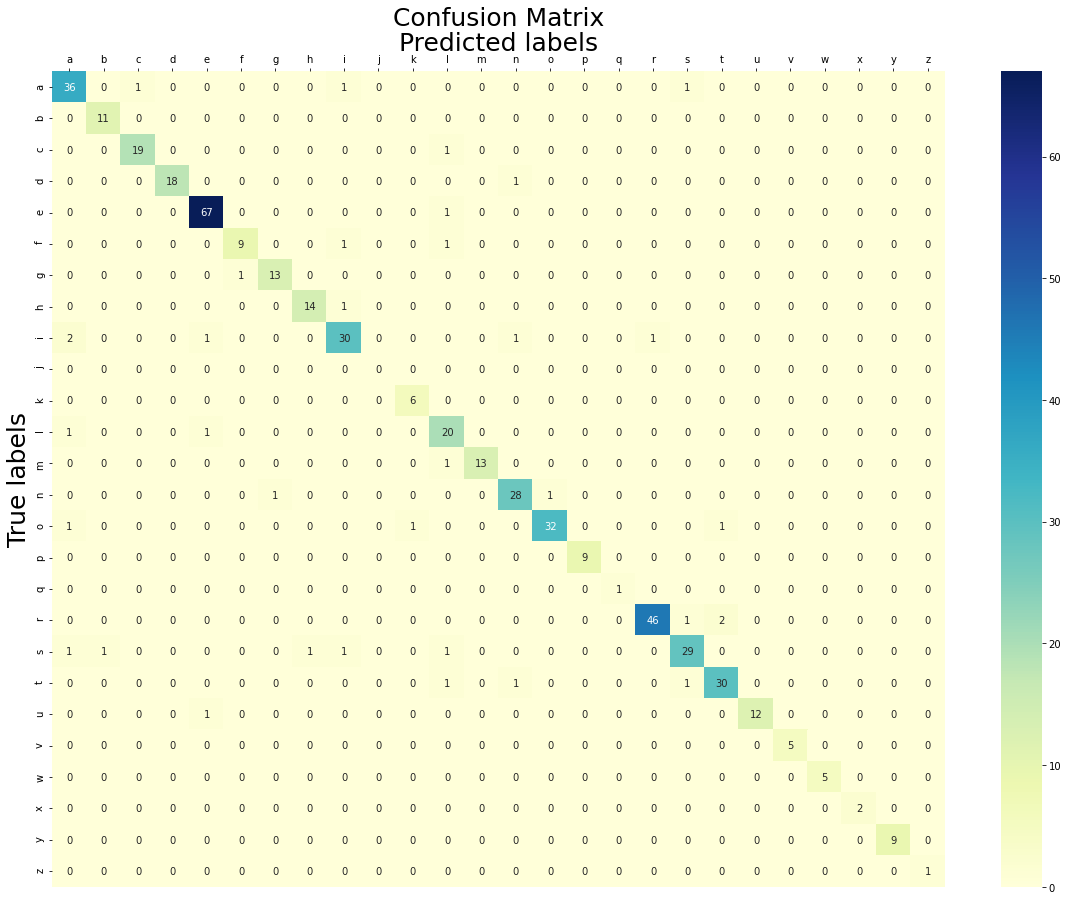

In [48]:
Verification('img',predictions=prediction)

EAST Images

# Text Recognition on EAST Generated Images

In [54]:
east_originals = [img[:-4] for img in os.listdir(eastbasefolder) if img.endswith('.png')]

In [56]:
east_prediction = pipeline.recognize(east_images)

In [57]:
for orig,pred in zip(east_originals,east_prediction):
    text = ''
    for item in pred:
        text += '\t' + item[0]
    print(orig+'....\t',text)

Risk....	 	rilis
Services....	 	b	services
4B.526....	 	1b	526
To....	 	ta
Tyre....	 	yre
Web....	 	web
FOSTERS'S....	 	fosters
HOME....	 	home
Philips....	 	philips
GOOD....	 	good
ON....	 	on
HERE....	 	here
CASK....	 	cask
CHILDREN....	 	childben
GARDEN....	 	garden
BOARDS....	 	boards
go....	 	oo
YOU....	 	you
M.O.T.....	 	mot
DRI_WIPE....	 	driewipe
arlboro....	 	anlhon
FLASH....	 	flash
POST....	 	post
ARGYLL'S....	 	argylls
SAMSUNG....	 	samsung
Greenstead....	 	greensteac
D....	 
115mm....	 	115mm
MORTAGES....	 	mortgages
Central....	 	lentra
Injury....	 	niir
raised....	 	raised
Footpath....	 	foatpath
MODERN....	 	modern
RYANAIR....	 	ryanair
Experience....	 	experience
NATIONAL....	 	scottish
LIFE!....	 	lieei
when....	 	when
4B.524....	 	ab	sea
(412)....	 	s0	4
4B.522....	 	abl572
CORAL....	 	corai
USE....	 	use
KEEP....	 	eep	k
LODGINGS....	 	lodgings
Revolution....	 	revolution
FOOD....	 	food
CONDITIONED....	 	conditioned
ESP....	 	ese
Orange....	 	orange
SONY....	 	sony

Accuracy  0.5670103092783505
edit distance 96 0.9896907216494846


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           a       0.83      0.89      0.86        27
           b       0.75      1.00      0.86         3
           c       0.90      1.00      0.95        18
           d       1.00      0.94      0.97        17
           e       0.87      0.96      0.91        48
           f       1.00      0.75      0.86         8
           g       1.00      0.93      0.96        14
           h       0.93      1.00      0.97        14
           i       0.91      0.97      0.94        30
           j       1.00      1.00      1.00         1
           k       0.80      0.80      0.80         5
           l       0.89      0.85      0.87        20
           m       1.00      1.00      1.00        10
           n       1.00      0.93      0.96        27
           o       0.90      0.90      0.90        31
           p       0.90      0.82      0.86        11
           q       0.00      0.00      0.00         0
           r       1.00    

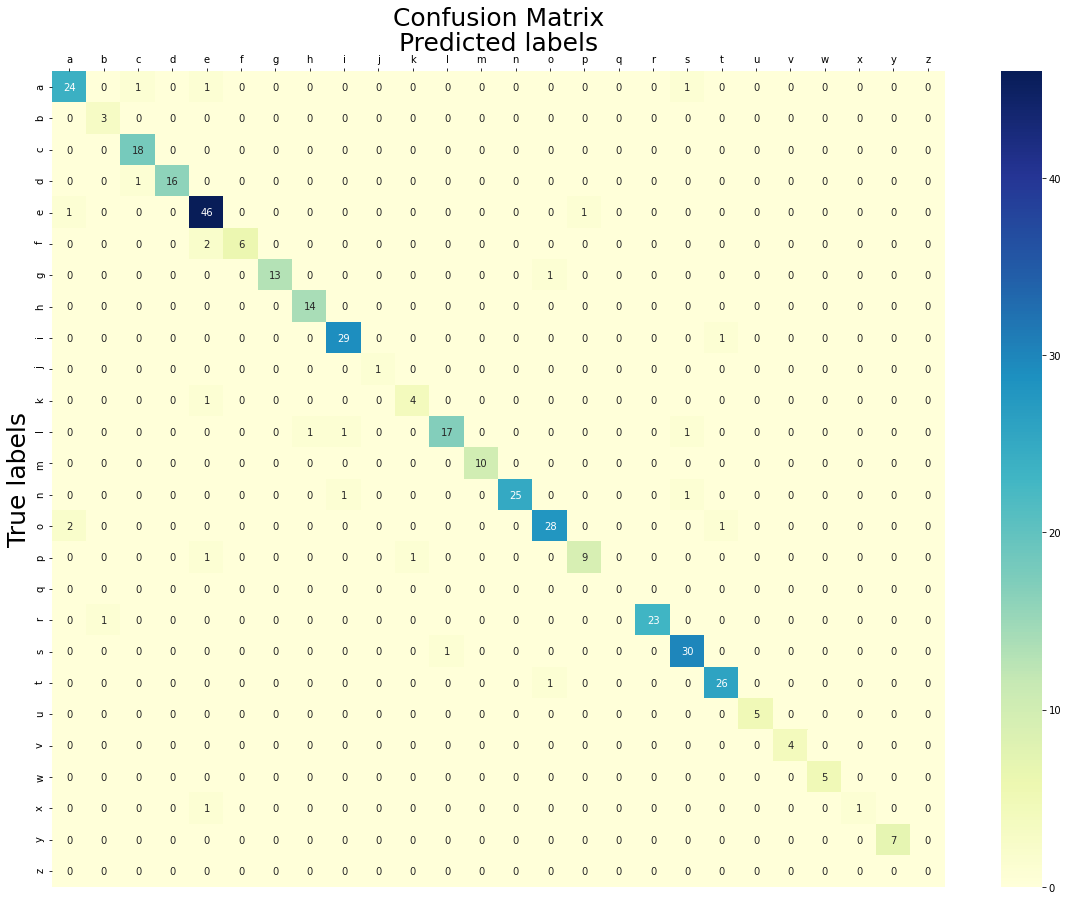

In [59]:
Verification('east',predictions=east_prediction)